In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import shapiro
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols

In [54]:
result_corona = pd.read_csv("mid_data/result_checkpoint.csv", thousands = ",", index_col = 0)
result_corona


result_corona.index_names = ["분기"]

In [55]:
result_corona

,3사 Mobile 매출,3사 PC매출,평균기온(°C),마케팅 비용,게임시장 규모
1Q2017,1.907603e+11,9.447470e+11,2.744561,1.858444e+11,2.049056e+12
2Q2017,5.611863e+11,7.456180e+11,17.886667,2.045050e+11,1.458523e+12
3Q2017,9.005560e+11,9.349635e+11,24.000000,2.372769e+11,2.051440e+12
4Q2017,8.958130e+11,7.834570e+11,7.394386,2.862413e+11,1.836915e+12
1Q2018,7.269950e+11,7.692030e+11,2.030175,2.416348e+11,2.473959e+12
2Q2018,5.324043e+11,7.308540e+11,17.555088,2.368410e+11,1.727453e+12
3Q2018,5.921097e+11,1.092198e+12,24.640351,2.473202e+11,1.923482e+12
4Q2018,5.627087e+11,7.497090e+11,7.538947,2.762086e+11,1.899634e+12
1Q2019,3.239240e+11,9.549040e+11,3.451228,2.448007e+11,2.228777e+12
2Q2019,3.402707e+11,8.318520e+11,17.073776,2.597875e+11,1.858589e+12


In [56]:
##### 기온 데이터 제외

df = result_corona.loc[:, ("3사 Mobile 매출", "3사 PC매출", "마케팅 비용", "게임시장 규모")]

In [57]:
print("변수들의 평균: \n", df.mean())
print("-----------------------------------------------------")
print("변수들의 분산: \n", df.var())        # 분산에 마케팅비용 이상치 -> 표준화 필요

변수들의 평균: 
 3사 Mobile 매출    7.158151e+11
3사 PC매출         1.089105e+12
마케팅 비용          2.770832e+11
게임시장 규모         2.118201e+12
dtype: float64
-----------------------------------------------------
변수들의 분산: 
 3사 Mobile 매출    1.030064e+23
3사 PC매출         1.067269e+23
마케팅 비용          4.000171e+21
게임시장 규모         1.006792e+23
dtype: float64


In [58]:
print("변수들의 최솟값: \n", df.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", df.max())

변수들의 최솟값: 
 3사 Mobile 매출    1.907603e+11
3사 PC매출         7.308540e+11
마케팅 비용          1.858444e+11
게임시장 규모         1.458523e+12
dtype: float64
-----------------------------------------------------
변수들의 최댓값: 
 3사 Mobile 매출    1.356090e+12
3사 PC매출         1.815808e+12
마케팅 비용          4.316472e+11
게임시장 규모         2.669047e+12
dtype: float64


### 정규화

In [59]:
from sklearn.preprocessing import MinMaxScaler         

scaler = MinMaxScaler()
scaler.fit(df)
result_scaled = scaler.transform(df)

df_normed = pd.DataFrame(data = result_scaled, columns = df.columns)

print("변수들의 최솟값: \n", df_normed.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", df_normed.max())

# 최솟값과 최댓값의 격차가 줄어들었다.

변수들의 최솟값: 
 3사 Mobile 매출    0.0
3사 PC매출         0.0
마케팅 비용          0.0
게임시장 규모         0.0
dtype: float64
-----------------------------------------------------
변수들의 최댓값: 
 3사 Mobile 매출    1.0
3사 PC매출         1.0
마케팅 비용          1.0
게임시장 규모         1.0
dtype: float64


In [60]:
df_normed

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
0,0.000000,0.197145,0.000000,0.487832
1,0.317872,0.013608,0.075917,0.000000
2,0.609094,0.188127,0.209243,0.489802
3,0.605024,0.048484,0.408445,0.312585
4,0.460157,0.035346,0.226972,0.838839
5,0.293174,0.000000,0.207470,0.222160
6,0.344408,0.333050,0.250102,0.384097
7,0.319179,0.017379,0.367629,0.364396
8,0.114271,0.206506,0.239852,0.636297
9,0.128299,0.093090,0.300823,0.330489


### 코로나 이전 모바일 매출액 

In [61]:
df_normed.index=['1Q2017','2Q2017','3Q2017','4Q2017','1Q2018','2Q2018','3Q2018','4Q2018','1Q2019','2Q2019','3Q2019','4Q2019','1Q2020','2Q2020','3Q2020','4Q2020','1Q2021','2Q2021','3Q2021']

In [62]:
df_normed

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
1Q2017,0.000000,0.197145,0.000000,0.487832
2Q2017,0.317872,0.013608,0.075917,0.000000
3Q2017,0.609094,0.188127,0.209243,0.489802
4Q2017,0.605024,0.048484,0.408445,0.312585
1Q2018,0.460157,0.035346,0.226972,0.838839
2Q2018,0.293174,0.000000,0.207470,0.222160
3Q2018,0.344408,0.333050,0.250102,0.384097
4Q2018,0.319179,0.017379,0.367629,0.364396
1Q2019,0.114271,0.206506,0.239852,0.636297
2Q2019,0.128299,0.093090,0.300823,0.330489


In [107]:
# 기온 데이터 제거 + 컬럼명 변경

#df_normed2 = df_normed.drop([df_normed.index[12],df_normed.index[13],df_normed.index[14],df_normed.index[15],df_normed.index[16],df_normed.index[17],df_normed.index[18]])
df_normed2 = df_normed[:12]
df_normed2.columns = ["삼사Mobile매출","삼사PC매출","마케팅비용","게임시장규모"]
# 컬럼명에 숫자가 들어가면 분석 실행이 안됨. 이름 변경!

In [108]:
df_normed2

,삼사Mobile매출,삼사PC매출,마케팅비용,게임시장규모
1Q2017,0.000000,0.197145,0.000000,0.487832
2Q2017,0.317872,0.013608,0.075917,0.000000
3Q2017,0.609094,0.188127,0.209243,0.489802
4Q2017,0.605024,0.048484,0.408445,0.312585
1Q2018,0.460157,0.035346,0.226972,0.838839
2Q2018,0.293174,0.000000,0.207470,0.222160
3Q2018,0.344408,0.333050,0.250102,0.384097
4Q2018,0.319179,0.017379,0.367629,0.364396
1Q2019,0.114271,0.206506,0.239852,0.636297
2Q2019,0.128299,0.093090,0.300823,0.330489


In [95]:
# 3사 mobile 매출액 관련

print(np.corrcoef(df_normed2["삼사Mobile매출"],df_normed2["삼사PC매출"])) 
print(np.corrcoef(df_normed2["삼사Mobile매출"],df_normed2["마케팅비용"])) 
print(np.corrcoef(df_normed2["삼사Mobile매출"],df_normed2["게임시장규모"]))

[[1.         0.07782212]
 [0.07782212 1.        ]]
[[ 1.         -0.14564171]
 [-0.14564171  1.        ]]
[[1.         0.12853421]
 [0.12853421 1.        ]]


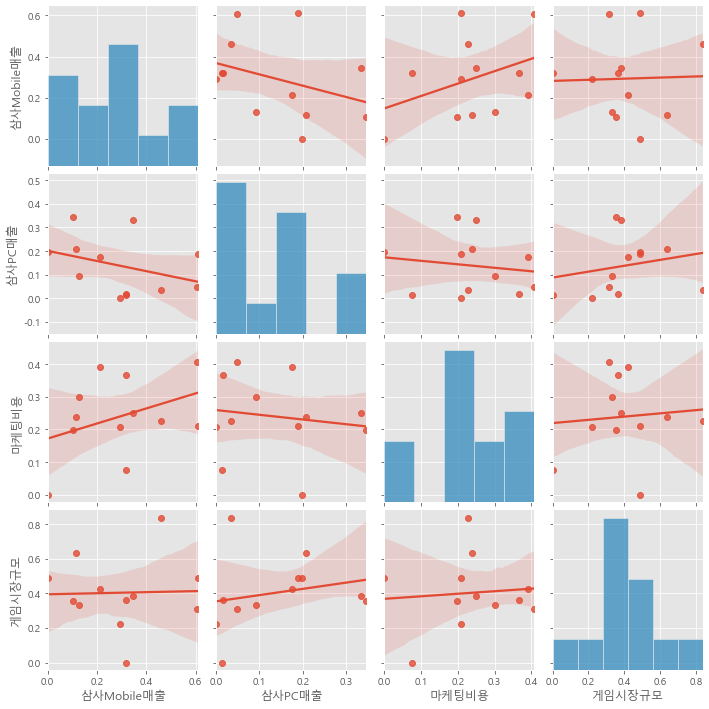

In [109]:
# 각 변수들 간의 상관관계 확인

sns.pairplot(df_normed2, vars=["삼사Mobile매출","삼사PC매출","마케팅비용","게임시장규모"],size=2.5,kind="reg")

#### 3사 Mobile매출과 3사 PC가 서로 관계가 있는지 산포도 와 기울기 확인

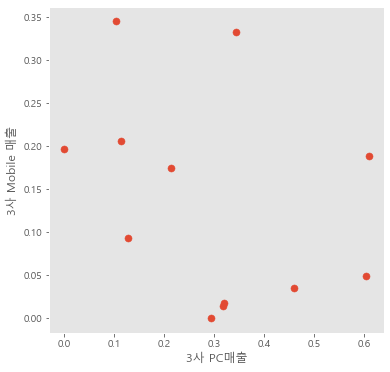

In [110]:


plt.figure(figsize=(6,6))
plt.scatter(df_normed2["삼사Mobile매출"],df_normed2["삼사PC매출"] ,s=50)
plt.xlabel("3사 PC매출")
plt.ylabel("3사 Mobile 매출")
plt.grid()

[-0.55151722  0.3683861 ]
 
-0.5515 x + 0.3684


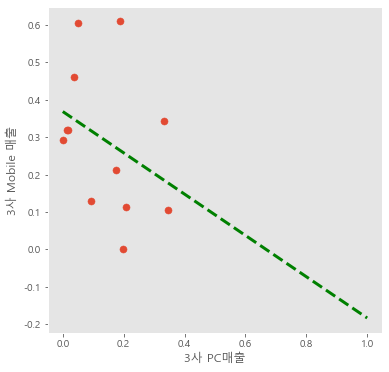

In [111]:
# 기울기와 절편

fp1= np.polyfit(df_normed2["삼사PC매출"],df_normed2["삼사Mobile매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1) 

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["삼사PC매출"],df_normed2["삼사Mobile매출"] ,s=50) 

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("3사 PC매출")
plt.ylabel("3사 Mobile 매출")
plt.grid()

# 기울기를 찾기는 했으나, 이상치가 눈에 띄게 많다.,, 
# 음의 상관관계를 볼 수 있다. 그런데 한쪽에 몰려 있다

#### 3사 Mobile매출과 마케팅 비용이 서로 관계가 있는지 산포도와 기울기 확인

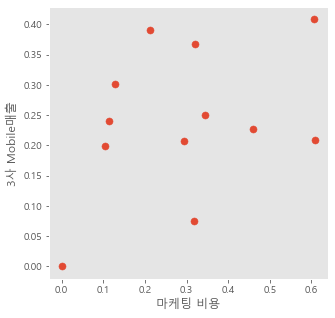

In [112]:



plt.figure(figsize=(5,5))
plt.scatter(df_normed2["삼사Mobile매출"],df_normed2["마케팅비용"] ,s=50)
plt.xlabel("마케팅 비용")
plt.ylabel("3사 Mobile매출")
plt.grid()

# 역시나 다 분산되어 있다..

[0.60340687 0.14775966]
 
0.6034 x + 0.1478


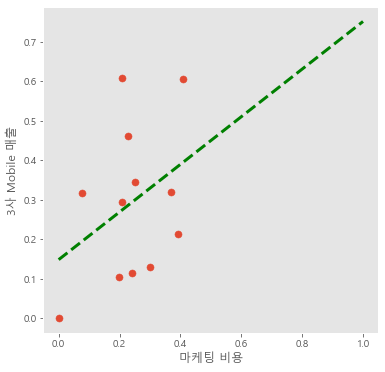

In [113]:
# 기울기와 절편

fp1= np.polyfit(df_normed2["마케팅비용"],df_normed2["삼사Mobile매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1) 

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["마케팅비용"],df_normed2["삼사Mobile매출"] ,s=50) 

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("마케팅 비용")
plt.ylabel("3사 Mobile 매출")
plt.grid()

# 양의 상관관계를 보이고 있다. 그러나 역시 앞쪽에 데이터가 몰려있ㄷ다. 

#### 3사 Mobile 매출과 전체 게임 산업과의 관계 산포도와 기울기 확인

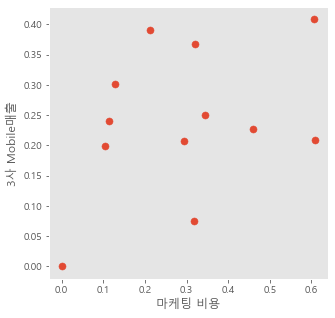

In [114]:



plt.figure(figsize=(5,5))
plt.scatter(df_normed2["삼사Mobile매출"],df_normed2["마케팅비용"] ,s=50) # s는 점크기
plt.xlabel("마케팅 비용")
plt.ylabel("3사 Mobile매출")
plt.grid()

[0.02693975 0.28153315]
 
0.02694 x + 0.2815


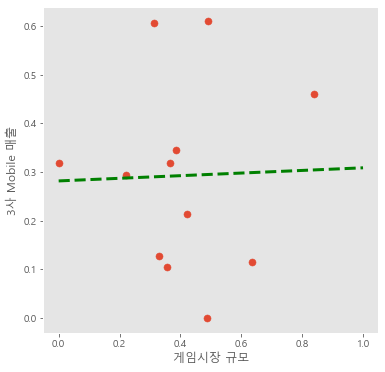

In [115]:
# 기울기와 절편

fp1= np.polyfit(df_normed2["게임시장규모"],df_normed2["삼사Mobile매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,1.0) 

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["게임시장규모"],df_normed2["삼사Mobile매출"] ,s=50) 

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("게임시장 규모")
plt.ylabel("3사 Mobile 매출")
plt.grid()

# 다른 변수들에 비해 거의 관계성을 안보이고 있다고 볼 수 있다......? 그럴수가 있나 
# 게임 산업 전체 의 규모가 커질수록 당연히 모바일도 커질 줄 알았는데 오히려 제일 관계성이 안보인다
# 굳이 정의 하자면 양의 관계

In [139]:
df_normed2["오차1"] = np.abs(df_normed2["삼사PC매출"]- f1(df_normed2["삼사Mobile매출"]))

df_normed2["오차2"] = np.abs(df_normed2["마케팅비용"]- f1(df_normed2["삼사Mobile매출"]))

df_normed2["오차3"] = np.abs(df_normed2["게임시장규모"]- f1(df_normed2["삼사Mobile매출"]))

In [140]:
df_normed3 = df_normed2.sort_values(by="오차1",ascending=False)
df_normed4 = df_normed2.sort_values(by="오차2",ascending=False)
df_normed5 = df_normed2.sort_values(by="오차3",ascending=False)

### Mobile 과 PC 의 경향

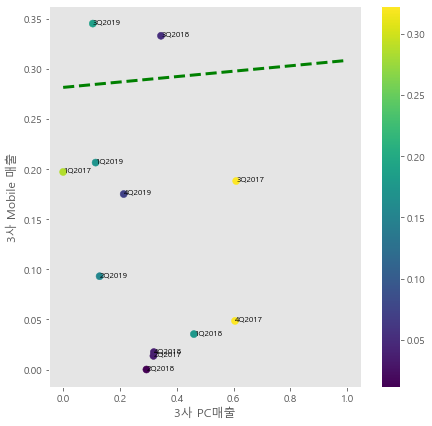

In [118]:
plt.figure(figsize=(7,7))
plt.scatter(df_normed2["삼사Mobile매출"],df_normed2["삼사PC매출"] ,s=50 ,c=df_normed2["오차1"]) 
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("3사 PC매출")
plt.ylabel("3사 Mobile 매출")
plt.grid()
plt.colorbar()

for n in range(12):
    plt.text(df_normed3["삼사Mobile매출"][n],df_normed3["삼사PC매출"][n],df_normed3.index[n],fontsize=8)

### Mobile 과 마케팅비용 의 경향

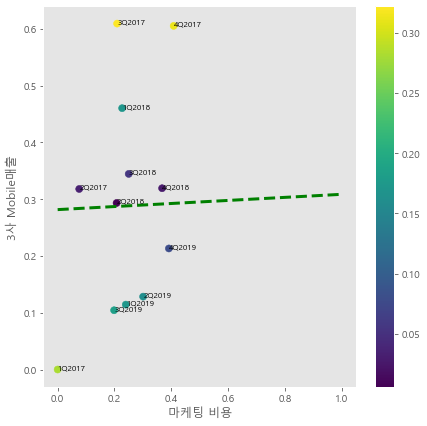

In [123]:
plt.figure(figsize=(7,7))
plt.scatter(df_normed2["마케팅비용"],df_normed2["삼사Mobile매출"] ,s=50 ,c=df_normed2["오차2"]) 
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("마케팅 비용")
plt.ylabel("3사 Mobile매출")
plt.grid()
plt.colorbar()

for n in range(12):
    plt.text(df_normed3["마케팅비용"][n],df_normed3["삼사Mobile매출"][n],df_normed3.index[n],fontsize=8)

### Mobile 과 게임시장규모 의 경향

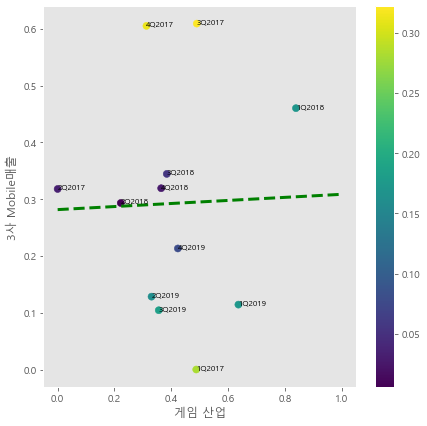

In [124]:
plt.figure(figsize=(7,7))
plt.scatter(df_normed2["게임시장규모"],df_normed2["삼사Mobile매출"] ,s=50 ,c=df_normed2["오차2"]) 
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("게임 산업")
plt.ylabel("3사 Mobile매출")
plt.grid()
plt.colorbar()

for n in range(12):
    plt.text(df_normed3["게임시장규모"][n],df_normed3["삼사Mobile매출"][n],df_normed3.index[n],fontsize=8)

Text(0.5, 1.0, 'heat map')

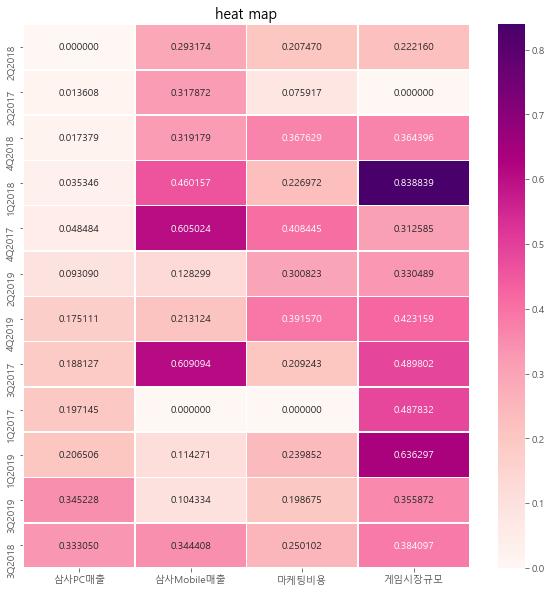

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(df_normed3[["삼사PC매출","삼사Mobile매출","마케팅비용","게임시장규모"]],cmap="RdPu",annot=True,fmt="f",linewidths=.5)


plt.title("heat map")

In [ ]:
##### 결과: 3사 Mobile 매출은 3사 PC매출과는 음의 상관관계를 보이며, 
#  마케팅 비용과는 양의 상관관계, 
#  게임시장 규모와는 큰 관계성을 보이지 않는다. ...?

In [ ]:
# 회귀분석을 돌려야 어느 정도로 관계가 있는지 확인을 해야함
# 등분산성 / 정규성 / 다중공선성 세가지 확인해야 하는거 하기


In [127]:
# from scipy.stats import shapiro
# from scipy.stats import norm
# from scipy import stats
# from statsmodels.formula.api import ols
# ## Shapiro-Wilks test
# ## 선형 모형 적합
# fit = ols('3사 Mobile매출 ~ 마케팅비용 + 게임시장규모',data=df_normed).fit()
 
# ## 이론상 잔차값 계산
# sqrt_mse = np.sqrt(fit.mse_resid) ## square root of mse
# std_res = fit.resid/sqrt_mse ## studentized residual
 
# ## Shapiro-Wilks 테스트의 검정통계량과 p-value를 계산한다.
# shapiro_test = stats.shapiro(std_res)
 
# sw_stat = shapiro_test[0] ## S-W 검정 통계량
# p_value = shapiro_test[1] ## p_value


In [144]:
df_normed2 = df_normed[0:12]
df_normed2.columns = ["삼사Mobile매출","삼사PC매출","마케팅비용","게임시장규모"]
df_normed2


,삼사Mobile매출,삼사PC매출,마케팅비용,게임시장규모
1Q2017,0.000000,0.197145,0.000000,0.487832
2Q2017,0.317872,0.013608,0.075917,0.000000
3Q2017,0.609094,0.188127,0.209243,0.489802
4Q2017,0.605024,0.048484,0.408445,0.312585
1Q2018,0.460157,0.035346,0.226972,0.838839
2Q2018,0.293174,0.000000,0.207470,0.222160
3Q2018,0.344408,0.333050,0.250102,0.384097
4Q2018,0.319179,0.017379,0.367629,0.364396
1Q2019,0.114271,0.206506,0.239852,0.636297
2Q2019,0.128299,0.093090,0.300823,0.330489


## 코로나 이전 데이터 회귀분석 - 기술적 분석

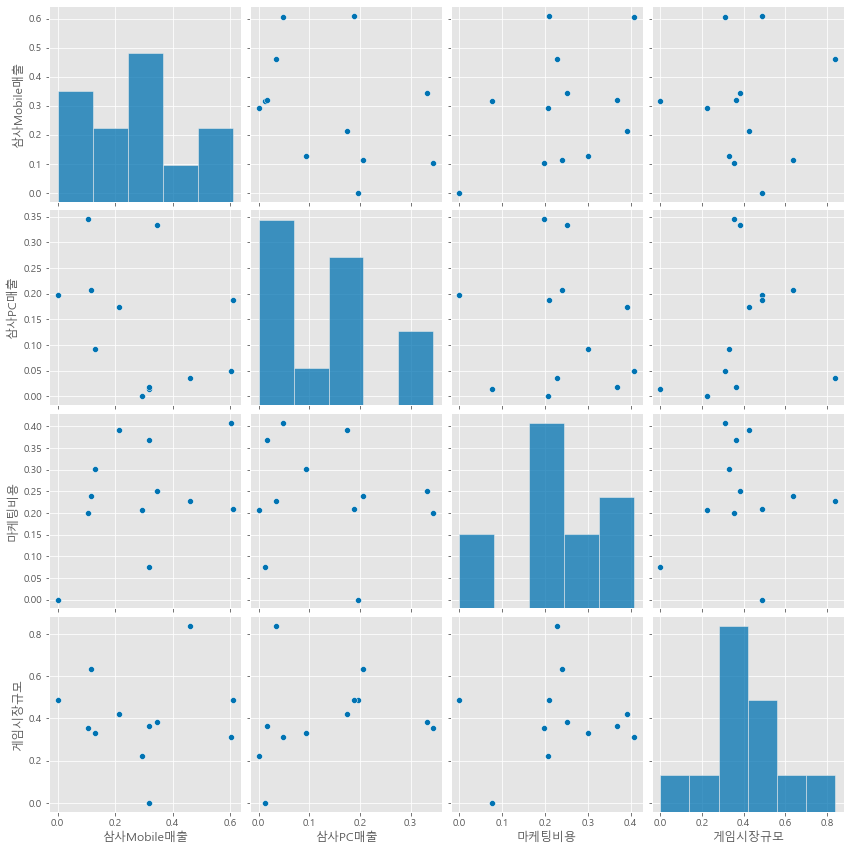

In [145]:
sns.set_palette('colorblind')
sns.pairplot(data=df_normed2, height=3)
# 산점도를 통해 변수간 관계 확인

<AxesSubplot:title={'center':'Heat Map'}>

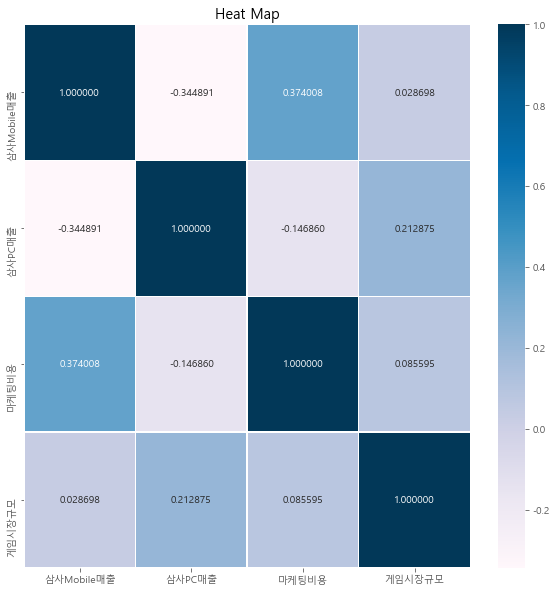

In [146]:
plt.figure(figsize=(10,10))
plt.title("Heat Map")
sns.heatmap(df_normed2.astype(float).corr(), linewidth=0.5, cmap="PuBu", annot=True, fmt="f")

## 선형 회귀모델 구축

In [147]:
X = df_normed3[['삼사PC매출','마케팅비용', '게임시장규모',]]
y = df_normed3['삼사Mobile매출']


regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.21083422613073136
Coefficients: [-0.49877445  0.520183    0.06336266]


### -> 3사 Mobile 매출 = 약 0.211
#### ~ 3사 PC 매출 : -0.49877445
#### ~ 마케팅 비용 : 0.520183
#### ~ 게임시장 규모 : 0.06336266

## 모델 검증

In [149]:
X = df_normed3[['삼사PC매출','마케팅비용', '게임시장규모']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_normed3['삼사Mobile매출'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:             삼사Mobile매출   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.7970
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.529
Time:                        16:30:05   Log-Likelihood:                 4.7128
No. Observations:                  12   AIC:                            -1.426
Df Residuals:                       8   BIC:                            0.5140
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2108      0.183      1.153      0.2

In [ ]:
# 조정된 R2 값 : 0.14, 즉 무의미하다..............? 흠...^^? 왜 숫자가 이럴까...

### 추정된 회귀식 

#### 3사 Mobile 매출 : 0.2108 + (-0.4988)(3사 pc 매출) + (-0.5202)(마케팅 비용) + 0.0634 * 게임시장 규모 

## 선형성 검증

In [150]:
df_normed2['모바일_pred'] = olsmod.predict(X) # 예측값 추가 한 뒤 실제값과 비교하기
df_normed2['residual'] = olsmod.resid
df_normed2.head(12)

,삼사Mobile매출,삼사PC매출,마케팅비용,게임시장규모,모바일_pred,residual
1Q2017,0.000000,0.197145,0.000000,0.487832,0.143414,-0.143414
2Q2017,0.317872,0.013608,0.075917,0.000000,0.243538,0.074335
3Q2017,0.609094,0.188127,0.209243,0.489802,0.256881,0.352213
4Q2017,0.605024,0.048484,0.408445,0.312585,0.418924,0.186100
1Q2018,0.460157,0.035346,0.226972,0.838839,0.364423,0.095734
2Q2018,0.293174,0.000000,0.207470,0.222160,0.332833,-0.039659
3Q2018,0.344408,0.333050,0.250102,0.384097,0.199154,0.145254
4Q2018,0.319179,0.017379,0.367629,0.364396,0.416490,-0.097311
1Q2019,0.114271,0.206506,0.239852,0.636297,0.272918,-0.158647
2Q2019,0.128299,0.093090,0.300823,0.330489,0.341827,-0.213528


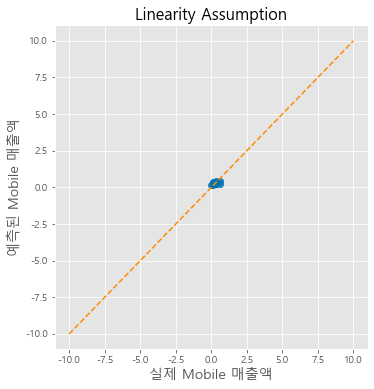

In [151]:
sns.lmplot(x="삼사Mobile매출", y='모바일_pred', data=df_normed2, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_normed2[["삼사Mobile매출", '모바일_pred']].min().min()-10, 
                        df_normed2[["삼사Mobile매출", '모바일_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('예측된 Mobile 매출액', fontsize=14)
plt.xlabel('실제 Mobile 매출액', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

### 정규성 검증

In [153]:
## Shapiro-Wilks test
## 선형 모형 적합
fit = ols('삼사Mobile매출 ~ 삼사PC매출 + 마케팅비용 + 게임시장규모',data=df_normed2).fit()
 
## 이론상 잔차값 계산
sqrt_mse = np.sqrt(fit.mse_resid) ## square root of mse
std_res = fit.resid/sqrt_mse ## studentized residual
 
## Shapiro-Wilks 테스트의 검정통계량과 p-value를 계산한다.
shapiro_test = stats.shapiro(std_res)
 
sw_stat = shapiro_test[0] ## S-W 검정 통계량
p_value = shapiro_test[1] ## p_value

print("검정통계량:", sw_stat) # 검정통계량 값 1에 가까움
print("p값:", p_value) # 귀무가설 채택 즉, 정규성을 만족한다고 할 수 있음


"""
검정통계량: 0.931158185005188  -> 1에 가까움
p값: 0.3925500512123108      -> 0.05보다 큼. 정규성 만족
"""

검정통계량: 0.931158185005188
p값: 0.3925500512123108


### 다중공선성 검증 

In [158]:
# 다중공선성 확인
df_normed2["intercept"] = 0.2108
lm = sm.OLS(df_normed2["삼사Mobile매출"],df_normed2[["intercept", "삼사PC매출", "마케팅비용", "게임시장규모"]])
results = lm.fit()
results.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002124D9EA370>>

In [160]:
y, X = dmatrices('삼사Mobile매출 ~  삼사PC매출+ 마케팅비용 + 게임시장규모', df_normed2, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

# 삼사모바일 매출과 나머지 변수간의 다중공선성 확인하기. 
# vif가 10 이상이면 다중공선성이 있다고 봄. 상수항 제외 나머지 독립변수들은 vif지수가 10아래임.

,VIF Factor,features
0,10.017661,Intercept
1,1.078480,삼사PC매출
2,1.037207,마케팅비용
3,1.063007,게임시장규모


In [ ]:
### -> vif 10 이상임. 그런데 나머지 독립변수들은 10 이하임. -> 제거 

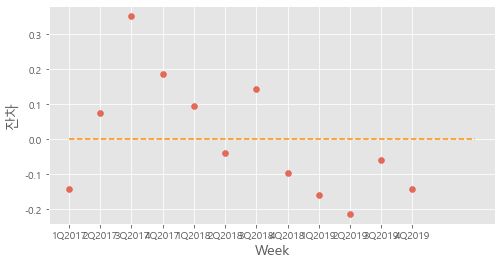

In [162]:
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_normed2.index, y=df_normed2.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_normed2.index)+2), color='darkorange', linestyle='--')

plt.ylabel('잔차', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.show()  

#### 잔차 퍼져있음... 등분산성 가정 충족 맞나요

### 결론 

+ 회귀식 : 3사 Mobile 매출 : 0.2108 + (-0.4988)(3사 pc 매출) + (-0.5202)(마케팅 비용) + 0.0634 * 게임시장 규모 
+ 조정된 R2 값이 0.14, 죽 14% 임. 추정된 회귀식으로는 14% 만 설명할 수 있다고 보여짐
+ 정규성 만족, 다중공정성 만족, 그리고 등분산성 가정 또한 충족